<img src="https://s3-sa-east-1.amazonaws.com/preditiva.ai/diversos/preditiva_assinatura.jpg">

# Regressão Logística

## Hands-On: Base Iris

In [1]:
# Pacotes de manipulação de dados
import numpy as np
import pandas as pd

# Pacotes gráficos
import matplotlib.pyplot as plt
import seaborn as sns

# Pacotes de data science
from sklearn import linear_model
from sklearn.metrics import accuracy_score

### Importação da base de dados

In [2]:
df = pd.read_csv('iris.csv')
df

FileNotFoundError: [Errno 2] No such file or directory: 'iris.csv'

### Análise Exploratória dos Dados
Crie alguma visualização de dados para verificar a distribuição das variáveis e como elas se relacionam com o Target (Planta_Orquidea).

**Dica**: Utilize a função pairplot do pacote Seaborn.

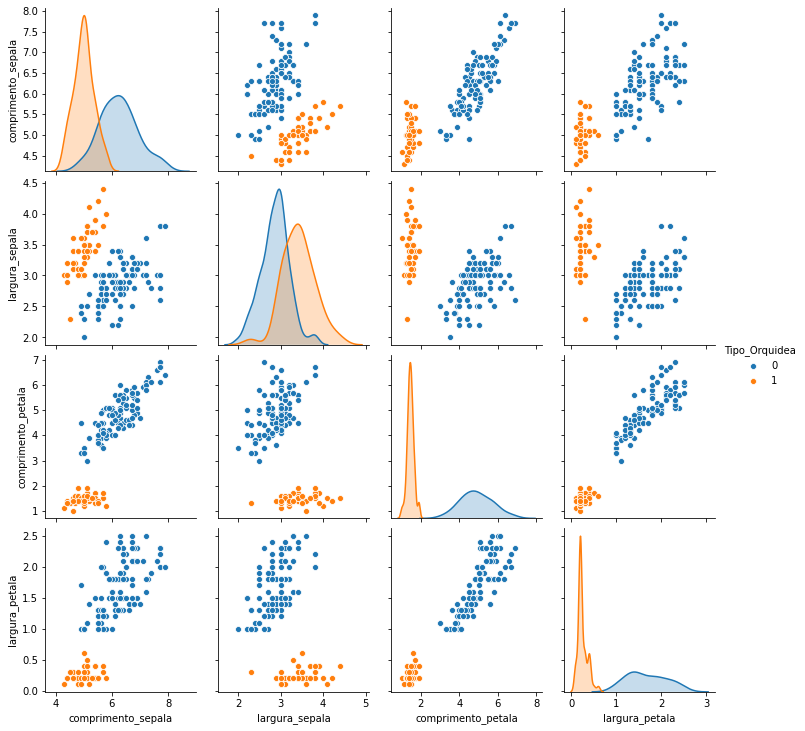

In [4]:
sns.pairplot(df, hue='Tipo_Orquidea');

### Ajuste uma regressão logística usando o Scikit Learn

In [5]:
# Variável resposta
y = df['Tipo_Orquidea']

# Variáveis explicativas
x = df[['comprimento_sepala',
        'largura_sepala',
        'comprimento_petala',
        'largura_petala']]

In [6]:
# Define estrutura e configurações do modelo
modelo = linear_model.LogisticRegression(random_state=42,
                                         fit_intercept=True)

# Ajusta o modelo
modelo.fit(x, y)

LogisticRegression(random_state=42)

In [7]:
# Obtenção dos coeficientes do modelo
print('Intercepto: {}' .format(modelo.intercept_))
print('Coeficientes: {}' .format(modelo.coef_))

Intercepto: [6.69040651]
Coeficientes: [[-0.44501376  0.89999242 -2.32353827 -0.97345836]]


### Crie uma variável no DataFrame inicial chamada "y_estimado" usando o corte de 0.5 na variável g(z).

**Dica**: Você pode utilizar o método **predict** do objeto modelo ajustado.

In [8]:
# Classificação estimada utilizando métodos do Scikit Learn
df['y_estimado'] = modelo.predict(x)
df.head(10)

,comprimento_sepala,largura_sepala,comprimento_petala,largura_petala,Tipo_Orquidea,y_estimado
0,5.1,3.5,1.4,0.2,1,1
1,4.9,3.0,1.4,0.2,1,1
2,4.7,3.2,1.3,0.2,1,1
3,4.6,3.1,1.5,0.2,1,1
4,5.0,3.6,1.4,0.2,1,1
5,5.4,3.9,1.7,0.4,1,1
6,4.6,3.4,1.4,0.3,1,1
7,5.0,3.4,1.5,0.2,1,1
8,4.4,2.9,1.4,0.2,1,1
9,4.9,3.1,1.5,0.1,1,1


### Calcule a acurácia do modelo

In [9]:
# Realizando o cálculo utilizando Scikit-Learn
accuracy_score(df['Tipo_Orquidea'], df['y_estimado'])

1.0

## Hands-On: Base Iris - Interpretação do Modelo

### Interprete os coeficientes do modelo

In [10]:
np.exp(modelo.intercept_)

array([804.64928527])

In [16]:
np.exp(modelo.coef_)

array([[0.64081546, 2.45958447, 0.09792648, 0.3777743 ]])

**Modelo Ajustado**

Tipo Orquídea = $\beta_0$ + $\beta_1$ * Comprimento Sepala + $\beta_2$ * Largura Sepala + $\beta_3$ * Comprimento Petala + $\beta_4$ * Largura Petala

$e^{\beta_0}$: Chance de uma flor com zero largura e comprimento da pétala e sépala pertencerem ao tipo 1 é de 805.

$e^{\beta_1}$: Cada aumento de 1cm no comprimento da sepala diminui em 36% a chance da flor pertencer ao tipo 1, mantendo tudo o mais constante.

$e^{\beta_2}$: Cada aumento de 1cm na largura da sepala aumenta em 146% a chance da flor pertencer ao tipo 1, mantendo tudo o mais constante.

$e^{\beta_3}$: Cada aumento de 1cm no comprimento da pétala diminui em 90% a chance da flor pertencer ao tipo 1, mantendo tudo o mais constante.

$e^{\beta_4}$: Cada aumento de 1cm na largura da pétala diminui em 62% a chance da flor pertencer ao tipo 1, mantendo tudo o mais constante.